<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#&quot;Analytical-solution&quot;" data-toc-modified-id="&quot;Analytical-solution&quot;-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>"Analytical solution"</a></span><ul class="toc-item"><li><span><a href="#Axis-1-to-2" data-toc-modified-id="Axis-1-to-2-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Axis 1 to 2</a></span></li><li><span><a href="#Run-the-same-experiments" data-toc-modified-id="Run-the-same-experiments-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Run the same experiments</a></span></li></ul></li><li><span><a href="#Load-Results-from-simulation" data-toc-modified-id="Load-Results-from-simulation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load Results from simulation</a></span></li><li><span><a href="#Plot-comparison-of-analytical-results-and-simulation" data-toc-modified-id="Plot-comparison-of-analytical-results-and-simulation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Plot comparison of analytical results and simulation</a></span></li><li><span><a href="#Combined-problem" data-toc-modified-id="Combined-problem-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Combined problem</a></span></li></ul></div>

In [2]:
%load_ext autoreload
%autoreload 2
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from routines_icu import *
from helpers_icu import *
import cvxpy as cp
from FW_icu import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# "Analytical solution"

## Axis 1 to 2

In [216]:
N=10

In [217]:
phi12=36
k12=10
phi_inv_12=36
k_inv_12=1
INVERSE_DEMAND_SHIFT=80

In [218]:
x_12=np.linspace(0,N,100)

C1=BPR(phi12,x_12,k12)
C2=-BPR(phi_inv_12,x_12,k_inv_12)+INVERSE_DEMAND_SHIFT
KK=C1-C2

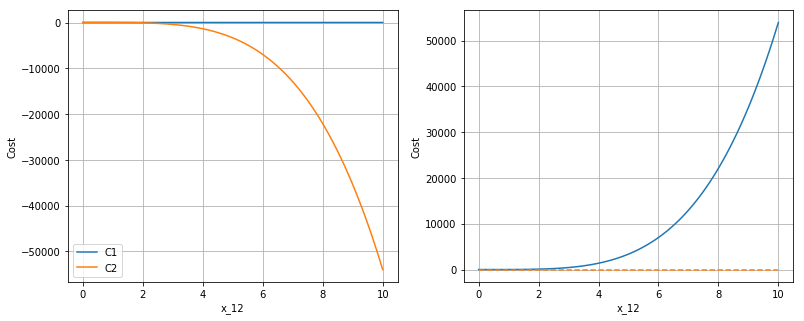

In [219]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.plot(x_12,C1,label=("C1"))
plt.plot(x_12,C2,label=("C2"))
plt.xlabel("x_12")
plt.ylabel("Cost")
plt.legend()
plt.grid(True)
plt.subplot(1,2,2)
plt.plot(x_12,KK,label="Total Cost")
plt.plot(x_12,np.ones(x_12.shape)*0,'--')
plt.xlabel("x_12")
plt.ylabel("Cost")
plt.grid(True)

In [220]:
C_T=BPR_int_val(phi12,x_12,k12)+BPR_int_val(phi_inv_12,x_12,k_inv_12)-INVERSE_DEMAND_SHIFT*x_12

Text(0, 0.5, 'Integral Cost')

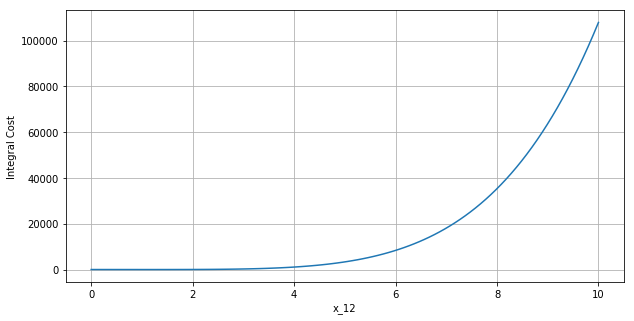

In [223]:
plt.figure(figsize=(10,5))
plt.plot(x_12,C_T)
plt.grid(True)
plt.xlabel("x_12")
plt.ylabel("Integral Cost")

In [233]:
x_12=cp.Variable()
constraints=[x_12>=0,x_12<=10]

C_T=BPR_int(phi12,x_12,k12)+BPR_int(phi_inv_12,x_12,k_inv_12)-INVERSE_DEMAND_SHIFT*x_12
prob=cp.Problem(cp.Minimize(C_T),constraints)
prob.solve()
print(prob.status)
print("optimal flow value:", x_12.value)

optimal
optimal flow value: 1.1032207628493276


In [185]:
C1=BPR(phi12,x_12.value,k12)
C2=-BPR(phi_inv_12,x_12.value,k_inv_12)+INVERSE_DEMAND_SHIFT
print(C1-C2)

-0.0007248212008690302


## Run the same experiments 

In [234]:
k_list=[1,3,5,8,10]

In [235]:
phi12=36
k12=10
phi_inv_12=36
k_inv_12=1
INVERSE_DEMAND_SHIFT=80

In [256]:
final_flow_exp=[]
k_list_exp=np.linspace(0.1,10,100)
for k in k_list_exp:

    x_12=cp.Variable()
    constraints=[x_12>=0,x_12<=10]

    C_T=BPR_int(phi12,x_12,k12)+BPR_int(phi_inv_12,x_12,k)-INVERSE_DEMAND_SHIFT*x_12
    prob=cp.Problem(cp.Minimize(C_T),constraints)
    prob.solve()
    print(prob.status)
    print("optimal flow value:", x_12.value)
    final_flow_exp.append(x_12.value)

optimal
optimal flow value: 0.1103250183960184
optimal
optimal flow value: 0.2206500965485224
optimal
optimal flow value: 0.3309749622162228
optimal
optimal flow value: 0.4412998535234335
optimal
optimal flow value: 0.5516249119549327
optimal
optimal flow value: 0.6619482128618097
optimal
optimal flow value: 0.7722750476390957
optimal
optimal flow value: 0.8825944440591507
optimal
optimal flow value: 0.9929113984593448
optimal
optimal flow value: 1.1032207628493276
optimal
optimal flow value: 1.2135276394108556
optimal
optimal flow value: 1.3238306716196035
optimal
optimal flow value: 1.4341230706853756
optimal
optimal flow value: 1.544406056983873
optimal
optimal flow value: 1.6546686041212337
optimal
optimal flow value: 1.7649079250062938
optimal
optimal flow value: 1.8751408515982857
optimal
optimal flow value: 1.9853341336244128
optimal
optimal flow value: 2.0954835694836067
optimal
optimal flow value: 2.205613492730561
optimal
optimal flow value: 2.3156955226634652
optimal
optimal

# Load Results from simulation

In [229]:
import os
import pickle

In [230]:
k_list=[1,3,5,8,10]

In [246]:
final_flow=[]
final_flow_rev=[]
for k in k_list:
    path = path='Data/2Nodes_analytical/outputs/quals/analytical_k_'+str(k)
    filename=os.listdir(path)[0]
    print(filename)

    with open(os.path.join(path, filename), 'rb') as f:
        G_FW, OD, ri_FW, n_outer, n_inner, balance, opt_res, OD_list, balance_list, params = pickle.load(f)
    final_flow.append(G_FW[-1][-1]['0']['1']['f_m']+G_FW[-1][-1]['0']['1']['f_r'])
    final_flow_rev.append(G_FW[-1][-1]['1']['0']['f_m']+G_FW[-1][-1]['1']['0']['f_r'])

output_L_10000_ni_1000_no_20_ev_0_relative_progress_fu_False.pkl
output_L_10000_ni_1000_no_20_ev_0_relative_progress_fu_False.pkl
output_L_10000_ni_1000_no_20_ev_0_relative_progress_fu_False.pkl
output_L_10000_ni_1000_no_20_ev_0_relative_progress_fu_False.pkl
output_L_10000_ni_1000_no_20_ev_0_relative_progress_fu_False.pkl


In [239]:
final_flow

[1.1106293706293695,
 3.2986213786213807,
 5.431088911088902,
 8.094365634365637,
 9.27360639360638]

In [244]:
final_flow_rev

[1.11062937062937,
 3.2986213786213794,
 5.431088911088898,
 8.09436563436562,
 9.273606393606386]

# Plot comparison of analytical results and simulation

In [258]:
import matplotlib

font = {'size'   : 15, 'weight': 'normal'}

matplotlib.rc('font', **font)

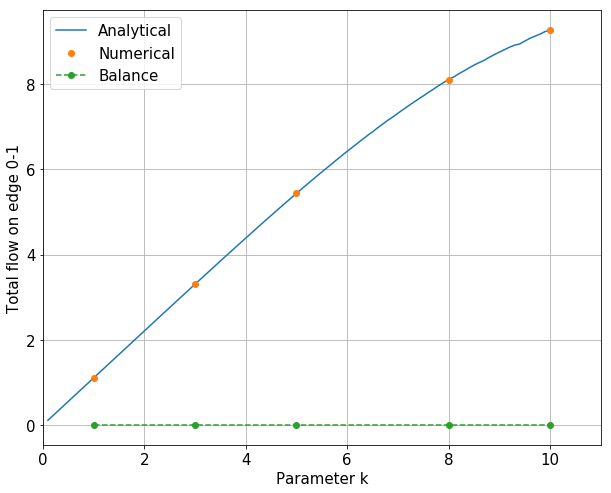

In [265]:
plt.figure(figsize=(10,8))

plt.plot(k_list_exp,final_flow_exp, label='Analytical')
plt.plot(k_list,final_flow, 'o',label='Numerical')
plt.plot(k_list, np.array(final_flow)-np.array(final_flow_rev), 'o--', label='Balance')
plt.grid(True)
plt.xlabel('Parameter k')
plt.ylabel('Total flow on edge 0-1')
plt.xlim([0, 11])
plt.legend()
plt.savefig('Data/ImagesQuals/analytical.png',transparent=True, dpi=400)

# Combined problem

Actually ended up not being used

In [138]:
N=10

In [139]:
phi12=10
k12=5
phi_inv_12=10
k_inv_12=2
INVERSE_DEMAND_SHIFT=80

In [140]:
phi21=10
k21=2
phi_inv_21=10
k_inv_21=3

In [141]:
x_12_p=cp.Variable()
x_12_r=cp.Variable()
x_21_p=cp.Variable()
x_21_r=cp.Variable()
x_12=x_12_p+x_12_r
x_21=x_21_p+x_21_r

constraints=[x_12_p>=0,x_12_p<=10, x_12_r>=0, x_21_p<=10, x_21_p>=0, x_21_r>=0, x_12==x_21]
obj12=BPR_int(phi12,x_12,k12)+BPR_int(phi_inv_12,x_12_p,k_inv_12)-INVERSE_DEMAND_SHIFT*x_12_p
obj21=BPR_int(phi21,x_21,k21)+BPR_int(phi_inv_21,x_21_p,k_inv_21)-INVERSE_DEMAND_SHIFT*x_21_p
C_T=obj12+obj21
prob=cp.Problem(cp.Minimize(C_T),constraints)
prob.solve()
print(prob.status)
print("optimal flow value 12:", x_12.value, x_12_p.value, x_12_r.value)
print("optimal flow value 21:", x_21.value, x_21_p.value, x_21_r.value)

optimal
optimal flow value 12: 4.8983932382658075 4.898392906010104 3.322557041341365e-07
optimal flow value 21: 4.898393237844196 4.898393122206078 1.15638118941432e-07


In [142]:
C1=BPR(phi12,x_12.value,k12)
C2=-BPR(phi_inv_12,x_12.value,k_inv_12)+INVERSE_DEMAND_SHIFT
print(C1-C2)

-4.644105075242003


In [143]:
C1=BPR(phi21,x_21.value,k21)
C2=-BPR(phi_inv_21,x_21.value,k_inv_21)+INVERSE_DEMAND_SHIFT
print(C1-C2)

4.635718276960176
